# Predictive Employee Turnover
## Final Project
Ana André, Data Squad #21 | Lisboa, 2019.10.11

## Data wrangling, cleaning and exploratory data analysis
- [1. Data wrangling and cleaning](#cleaning)
- [2. Exploratory data analysis](#eda)

<a name="cleaning"></a>
## 1. Data wrangling and cleaning


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# display full output and not only the last result
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

%config InlineBackend.figure_format ='retina'
%matplotlib inline

### Load the data

In [4]:
# load the data
data = pd.read_csv('../1_Data/kaggle_original_data/HR_comma_sep_14000.csv')#, header = None) # cleaned dataset
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<a name="machine-learning"></a>
## 3. Machine learning

### Data preprocessing

In [38]:
# checking for the number of employees who left or not
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

#### Converting 'department' column to numeric

In [42]:
# checking for unique values in department
data.department.unique()

#'RandD' stands for Research and Development

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [43]:
# creating dictionary with the new labels
depts = list(data.department.unique())

label = list(range(len(depts)))

depts_labels = dict(zip(depts,label))
depts_labels

{'sales': 0,
 'accounting': 1,
 'hr': 2,
 'technical': 3,
 'support': 4,
 'management': 5,
 'IT': 6,
 'product_mng': 7,
 'marketing': 8,
 'RandD': 9}

In [129]:
# replace values
data_ml = data.copy()
data_ml.department = data_ml.department.replace(depts_labels)
data_ml.department.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

#### Converting 'salary' column to numeric

In [46]:
# checking for unique values in salary
data.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [47]:
# creating dictionary with the new labels
salary = list(data.salary.unique())

lab = list(range(len(salary)))

sal_lab = dict(zip(salary,lab))
sal_lab

{'low': 0, 'medium': 1, 'high': 2}

In [130]:
# replace values
data_ml.salary = data_ml.salary.replace(sal_lab)
data_ml.salary.unique()

array([0, 1, 2], dtype=int64)

#### Drop 'average_montly_hours' column

I decided to drop the 'average_montly_hours' because it has the same information as the 'average_weekly_hours'.

In [218]:
data_ml.drop('average_montly_hours', axis = 1, inplace = True)

In [219]:
data_ml.head(1)

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,avg_weekly_hours
0,0.38,0.53,2,3,0,1,0,0,0,39.25


### Standardize the data

In [220]:
data_ml.describe()

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,avg_weekly_hours
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,3.498233,0.144610,0.238083,0.021268,3.339823,0.594706,50.262584
std,0.248631,0.171169,1.232592,1.460136,0.351719,0.425924,0.144281,2.820837,0.637183,12.485775
min,0.090000,0.360000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000
25%,0.440000,0.560000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000
50%,0.640000,0.720000,4.000000,3.000000,0.000000,0.000000,0.000000,3.000000,1.000000,50.000000
75%,0.820000,0.870000,5.000000,4.000000,0.000000,0.000000,0.000000,6.000000,1.000000,61.250000
max,1.000000,1.000000,7.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000,77.500000


Regarding the above summary of the data, I only standardized the 'avg_weekly_hours' because it has a higher magnitude.

In [224]:
# copy the dataframe
data_ml_std = data_ml.copy()
data_ml_std.head(1)

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,avg_weekly_hours
0,0.38,0.53,2,3,0,1,0,0,0,39.25


In [225]:
# using MixMaxScaler()
from sklearn.preprocessing import MinMaxScaler
data_ml_std['avg_weekly_hours'] = MinMaxScaler().fit_transform(data_ml_std['avg_weekly_hours'].values.reshape(-1,1)).reshape(1,-1)[0]

### Evaluating correlation

In [226]:
corr_matrix = data_ml_std.corr()
corr_matrix

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,avg_weekly_hours
satisfaction_level,1.000000,0.105021,-0.142970,-0.100866,0.058697,-0.388375,0.025605,0.015413,0.050022,-0.020048
last_evaluation,0.105021,1.000000,0.349333,0.131591,-0.007104,0.006567,-0.008684,0.011855,-0.013002,0.339742
number_project,-0.142970,0.349333,1.000000,0.196786,-0.004741,0.023787,-0.006064,0.005577,-0.001803,0.417211
time_spend_company,-0.100866,0.131591,0.196786,1.000000,0.002120,0.144822,0.067433,-0.001611,0.048715,0.127755
Work_accident,0.058697,-0.007104,-0.004741,0.002120,1.000000,-0.154622,0.039245,0.019215,0.009247,-0.010143
left,-0.388375,0.006567,0.023787,0.144822,-0.154622,1.000000,-0.061788,-0.043814,-0.157898,0.071287
promotion_last_5years,0.025605,-0.008684,-0.006064,0.067433,0.039245,-0.061788,1.000000,0.015170,0.098119,-0.003544
department,0.015413,0.011855,0.005577,-0.001611,0.019215,-0.043814,0.015170,1.000000,0.033415,-0.002387
salary,0.050022,-0.013002,-0.001803,0.048715,0.009247,-0.157898,0.098119,0.033415,1.000000,-0.002242
avg_weekly_hours,-0.020048,0.339742,0.417211,0.127755,-0.010143,0.071287,-0.003544,-0.002387,-0.002242,1.000000


The feature highest correlated with 'left' is satisfaction level and it's a negative correlation, which means that when one goes up, the other one goes down. This means that satisfaction level is the feature that weights more in the decision of leaving or not.

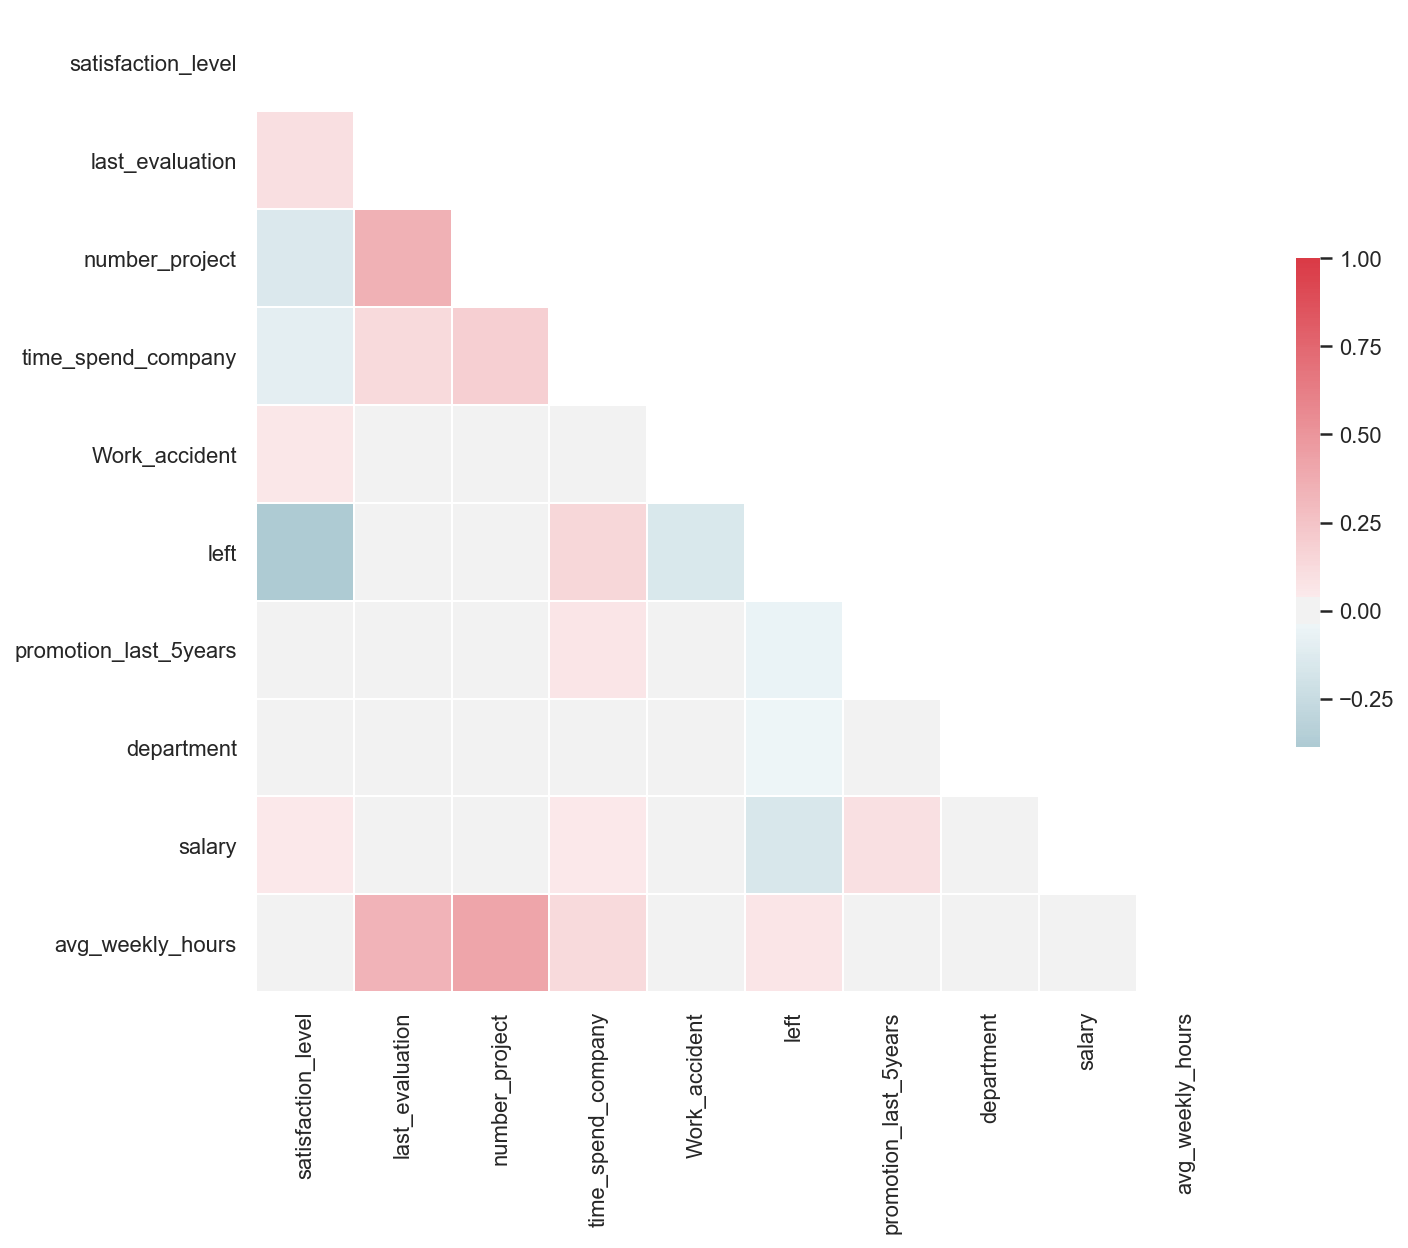

In [227]:
# heatmap for correlation matrix
sns.set(style="white")

# generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap = True)

# draw the heatmap with the mask and correct aspect ration
sns.heatmap(corr_matrix, mask=mask, cmap = cmap , center = 0,
           square = True, linewidths=.5, cbar_kws={'shrink':.5})


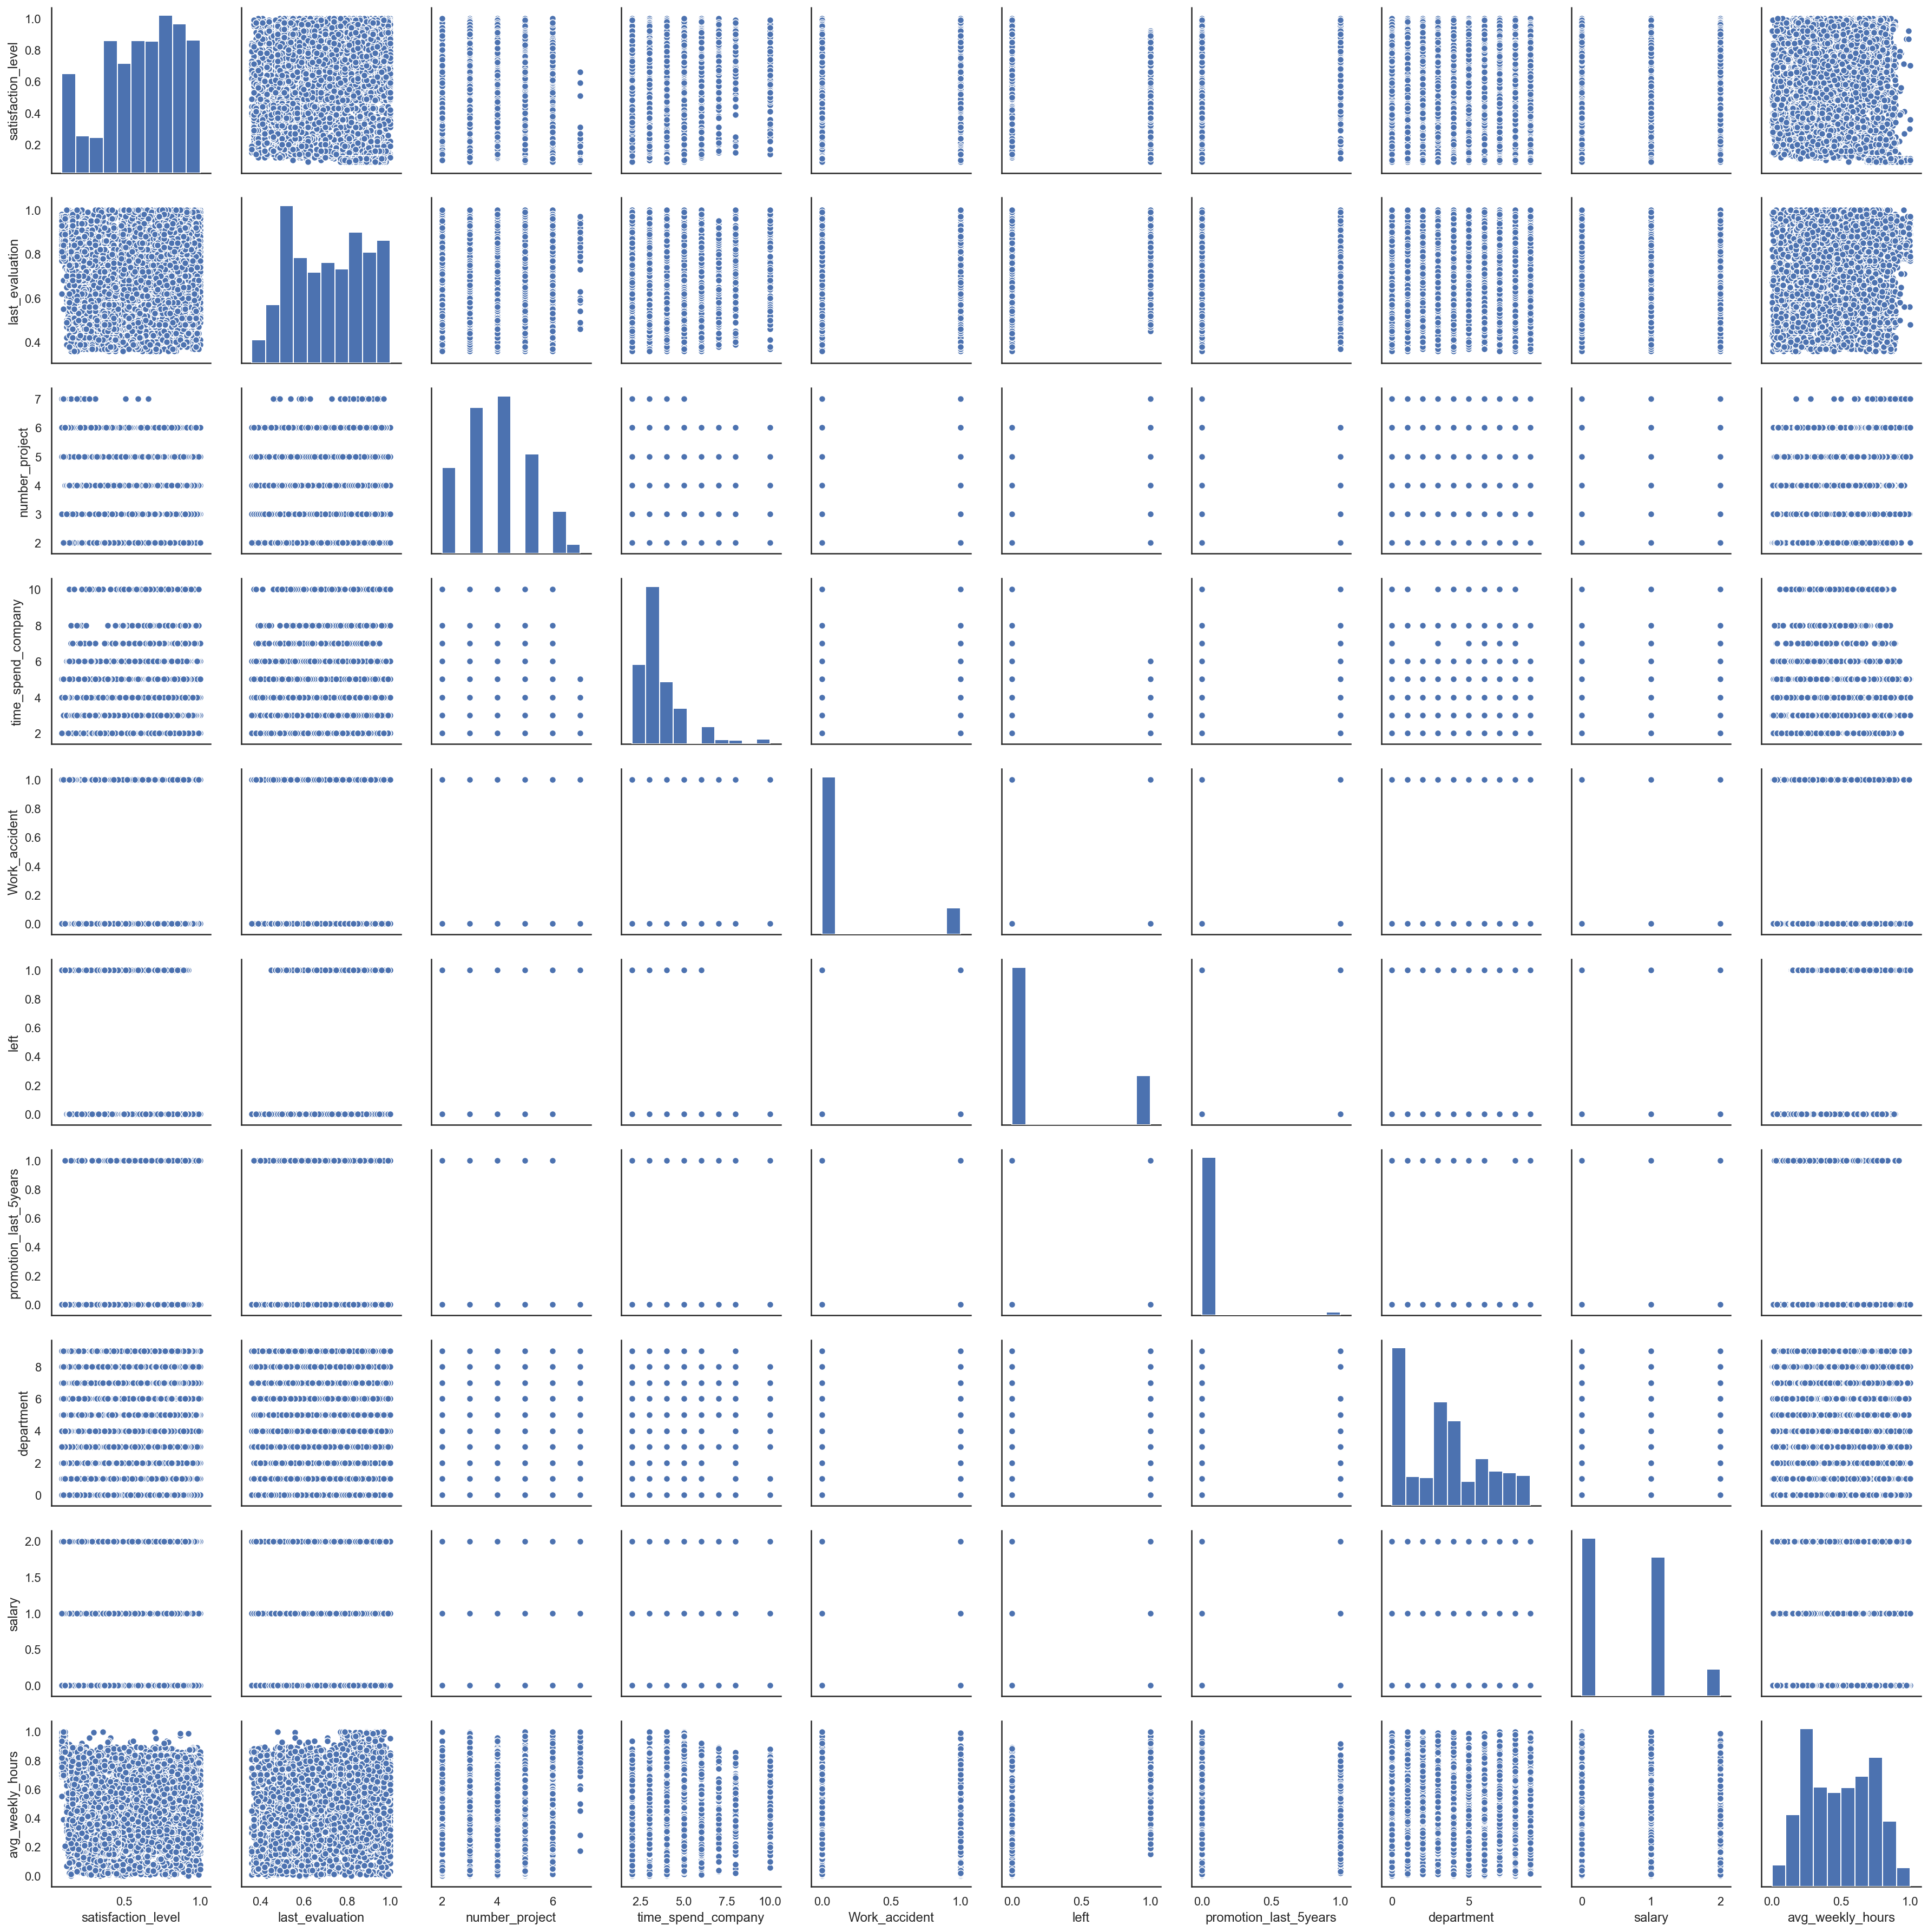

In [228]:
sns.pairplot(data_ml_std)

### Split and resample the data

In [229]:
# check value counts for each target label
data_ml_std.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [230]:
# check the ration between positive and negative target values
data_ml_std.left.value_counts()[1] / data_ml_std.left.value_counts()[0]

0.31247812390619534

There are 31% more non-leaving than leaving employees records, so I resampled the data. Otherwise, class imbalance can bias the model by influencing the learning algorithm during training which can favor decision rule towards the majority class.

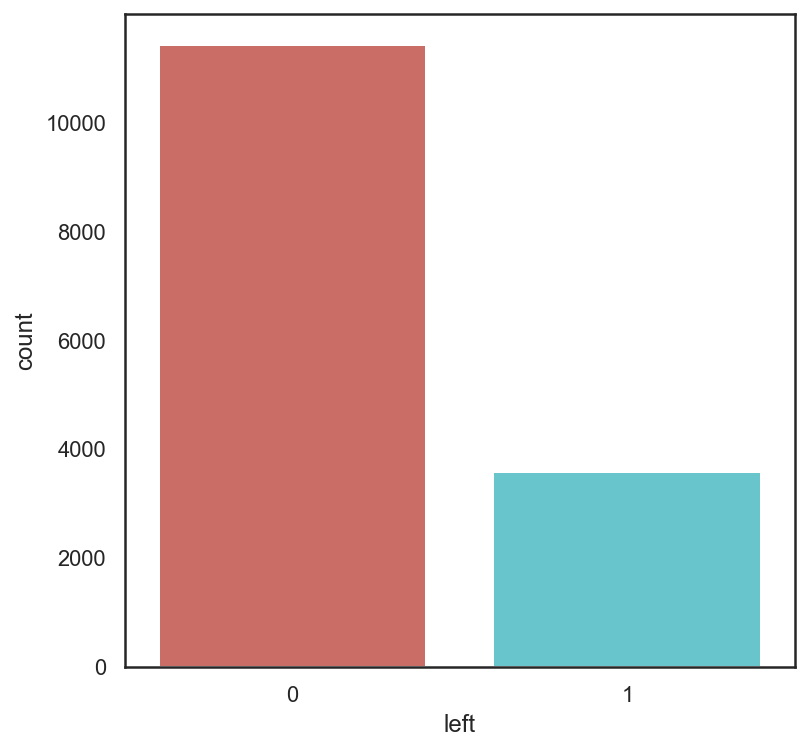

In [231]:
# plot target histogram
f, ax = plt.subplots(figsize=(6,6))
sns.countplot(x= data_ml_std['left'], palette='hls')
plt.show()

#### Split the data into training and test

In [276]:
# separate the dataframe into predictor and response variables
X = data_ml_std.drop(['left'], axis = 1) # features
y = data_ml_std['left'] # target

# splitting the data to train and test
from sklearn.model_selection import train_test_split

training_prop = 0.8 
# 80% of data to train the models and 20% to test their performances
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = training_prop, random_state=29)

#### Downsample the training dataset

I resampled the training data and not the whole data set because, in my opinion, that's the one used to fit the model and for that is the most relevant to the models performance. For testing, my model should be abble to work with both imbalanced and balanced data.

In [233]:
from sklearn.utils import resample

# concatenate our training data back together
X_concat = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
non_leaving = X_concat[X_concat['left']==0]
left = X_concat[X_concat['left']==1]

X_concat.head(1)

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,promotion_last_5years,department,salary,avg_weekly_hours,left
10381,0.34,0.82,6,3,0,0,0,0,0.495327,0


In [234]:
# check total value counts for the label column
y_train.value_counts()

0    9112
1    2887
Name: left, dtype: int64

In [235]:
# downsample non leaving sample
non_leaving_down = resample(non_leaving,
                                replace = False, # sample without replacement
                                n_samples = len(left), # match minority n
                                random_state = 29) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([non_leaving_down, left])

# checking counts
downsampled.left.value_counts()

1    2887
0    2887
Name: left, dtype: int64

#### Split the training data

In [236]:
y_train_down = downsampled.left
X_train_down = downsampled.drop(['left'], axis=1)

## Supervised Machine Learning
### Modeling, prediction and evaluation

I used 4 classification models:
- logistic regression
- decision tree
- support vector machine
- k-nearest neighbour

The methodology that I followed when building the classifiers goes as follows:
- load the model
- initialize the model
- fit the model to the training data
- calculate accuracy score for the train data
- predict the response for the test data
- plot confusion matrix
- calculate accuracy score for the test and predicted data
- compare accuracy scores and pick the best estimator using test data.

To evaluate the best estimator model, besides accuracy score, I also used:
- classification report
- ROC evaluation.

### Logistic regression

In [237]:
# load logistic regression
from sklearn.linear_model import LogisticRegression

# initialize the model
lr = LogisticRegression()

# fit the model to the training data
lr.fit(X_train_down, y_train_down)

C:\Nane\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [238]:
# accuracy score for training
acc_lr_train = lr.score(X_train_down, y_train_down) * 100

print(f"Logistic Regression Train Accuracy {round(acc_lr_train, 2)}%")

Logistic Regression Train Accuracy 77.24%


In [239]:
# predict the response for the test dataset
y_pred_lr = lr.predict(X_test)

In [240]:
# create confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

confusion_matrix(y_test, y_pred_lr)

array([[1758,  558],
       [ 124,  560]], dtype=int64)

Analyzing the results:
1765 + 560 correct predictions and 124 + 551 incorrect prediction

- C0,0 - the count of true negatives
- C1,0 - false negatives
- C1,1 - true positives
- C0,1 - false positives

In [241]:
# accuracy score for testing
acc_lr_test = lr.score(X_test, y_test) * 100

print(f"Logistic Regression Test Accuracy {round(acc_lr_test, 2)}%")

Logistic Regression Test Accuracy 77.27%


In [242]:
# create dictionary to compare the accuracy results of each model
acc_dict = {}

acc_dict['logistic regression'] = accuracy_score(y_test, y_pred_lr)

acc_dict

{'logistic regression': 0.7726666666666666}

In [243]:
sum(abs(y_pred_lr - y_test))

682

### Decision Tree

In [244]:
# load decision tree
from sklearn.tree import DecisionTreeClassifier

# initialize the model
dtc = DecisionTreeClassifier()

# fit the model to the training data
dtc.fit(X_train_down, y_train_down)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [245]:
# accuracy score for training
acc_dtc_train = dtc.score(X_train_down, y_train_down) * 100

print(f"Decision Tree Train Accuracy {round(acc_dtc_train, 2)}%")

Decision Tree Train Accuracy 100.0%


In [246]:
# predict the response for the test dataset
y_pred_dtc = dtc.predict(X_test)

# create confusion matrix
confusion_matrix(y_test, y_pred_dtc)

array([[2228,   88],
       [  22,  662]], dtype=int64)

Analyzing the results:
2230 + 664 correct predictions and 20 + 86 incorrect prediction

In [247]:
# print accuracy_score for the testing
accuracy_score(y_test, y_pred_dtc)

0.9633333333333334

In [248]:
# append results to acc_dict
acc_dict['decision tree'] = accuracy_score(y_test, y_pred_dtc)

In [249]:
sum(abs(y_pred_dtc - y_test))

110

### Support vector machine

In [250]:
# load support vector machine
from sklearn.svm import SVC

# initialize the model
svm = SVC()

# fit the model to the training data
svm.fit(X_train_down, y_train_down)

C:\Nane\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [251]:
# accuracy score for training
acc_SVC_train = svm.score(X_train_down, y_train_down) * 100

print(f"Support vector machine Train Accuracy {round(acc_SVC_train, 2)}%")

Support vector machine Train Accuracy 93.06%


In [252]:
# predict the response for the test dataset
y_pred_SVC = svm.predict(X_test)

# create the confusion matrix
confusion_matrix(y_test, y_pred_SVC)

array([[2137,  179],
       [  43,  641]], dtype=int64)

Analyzing the results:
2161 + 648 correct predictions and 36 + 155 incorrect prediction

In [253]:
# print accuracy_score for the testing
accuracy_score(y_test, y_pred_SVC)

0.926

In [254]:
# print accuracy_score for the testing
accuracy_score(y_test, y_pred_SVC)

0.926

In [255]:
# append results to acc_dict
acc_dict['support vector machine'] = accuracy_score(y_test, y_pred_SVC)

In [256]:
sum(abs(y_pred_SVC - y_test))

222

### K-nearest neighbour

In [257]:
# load KNN model
from sklearn.neighbors import KNeighborsClassifier

# initialize the model
n_neigh = 2 # because I have 2 labels
knn = KNeighborsClassifier(n_neighbors = n_neigh)

# fit the model to the training data
knn.fit(X_train_down, y_train_down)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [258]:
# accuracy score for training
acc_KNN_train = knn.score(X_train, y_train)*100

print(f"KNN Test Accuracy {round(acc_KNN_train, 2)}%")

KNN Test Accuracy 95.99%


In [259]:
# predict the response for the test dataset
y_pred_KNN = knn.predict(X_test)

# create the confusion matrix
confusion_matrix(y_test, y_pred_KNN)

array([[2167,  149],
       [  37,  647]], dtype=int64)

Analyzing the results:
2142 + 644 correct predictions and 40 + 175 incorrect prediction

In [260]:
# append results to acc_dict
acc_dict['KNN'] = accuracy_score(y_test, y_pred_KNN)

In [261]:
sum(abs(y_pred_KNN - y_test))

186

### Evaluation
#### Compare accuracy and pick best model

In [262]:
# check accuracy score results
acc_dict

{'logistic regression': 0.7726666666666666,
 'decision tree': 0.9633333333333334,
 'support vector machine': 0.926,
 'KNN': 0.938}

In [263]:
# pick method with higher accuracy
max(acc_dict, key = acc_dict.get)

'decision tree'

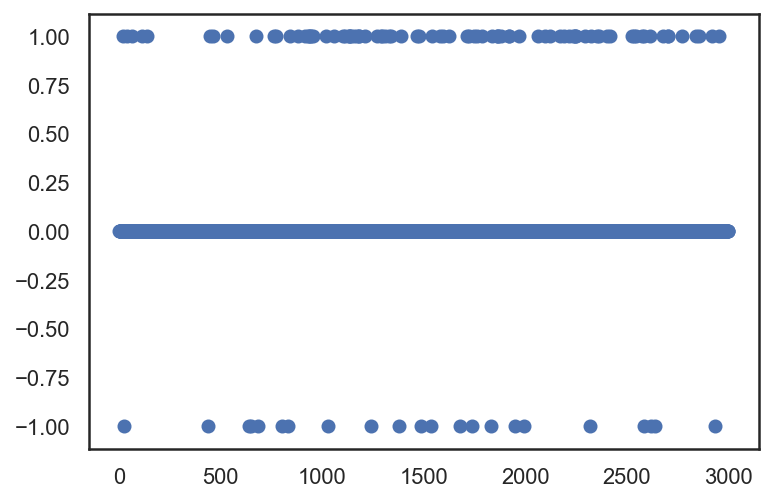

In [264]:
# plot decision tree
x_plot = list(range(len(y_test)))
y_pred = dtc.predict(X_test)

plt.scatter(x_plot, y_pred - y_test, label = 'pred')#, alpha = 0.5)
#plt.scatter(x_plot, y_test, label = 'test', alpha = 0.5)
#plt.legend()
plt.show()

# the ones where the model fails are the values in 1(y_pred higher than y_test) and -1 (the opposite)

#### Compare f1 score

In [300]:
# calculate f1 score
from sklearn.metrics import f1_score

# create dictionary
f1score_dict = {}

f1score_dict['logistic regression'] = f1_score(y_test, y_pred_lr)
f1score_dict['decision tree'] = f1_score(y_test, y_pred_dtc)
f1score_dict['SVM'] = f1_score(y_test, y_pred_SVC)
f1score_dict['KNN'] = f1_score(y_test, y_pred_KNN)

# pick method with higher accuracy
max(acc_dict, key = acc_dict.get)

'decision tree'

In [301]:
f1score_dict

{'logistic regression': 0.6215316315205327,
 'decision tree': 0.9232914923291493,
 'SVM': 0.8523936170212766,
 'KNN': 0.8743243243243244}

Undoubtly, decision tree is the best classifier.

#### Classification report

In [265]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2316
           1       0.88      0.97      0.92       684

    accuracy                           0.96      3000
   macro avg       0.94      0.96      0.95      3000
weighted avg       0.97      0.96      0.96      3000



Precision is the ratio of true positives to the sum of true and false positives (accuracy of positive predictions).

Recall is the ratio of true positives to the sum of true positives and false negatives. So it's the fraction of positives that were correctly identified.

F1 score represents the percent of positive predictions that were correct.

From the classification report, I can conclude that my model:
- has a better performance of negative predictions than positives
- gets almost all of the positive samples.

#### ROC Evaluation

0.9649198557706875


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC for Decision Tree')

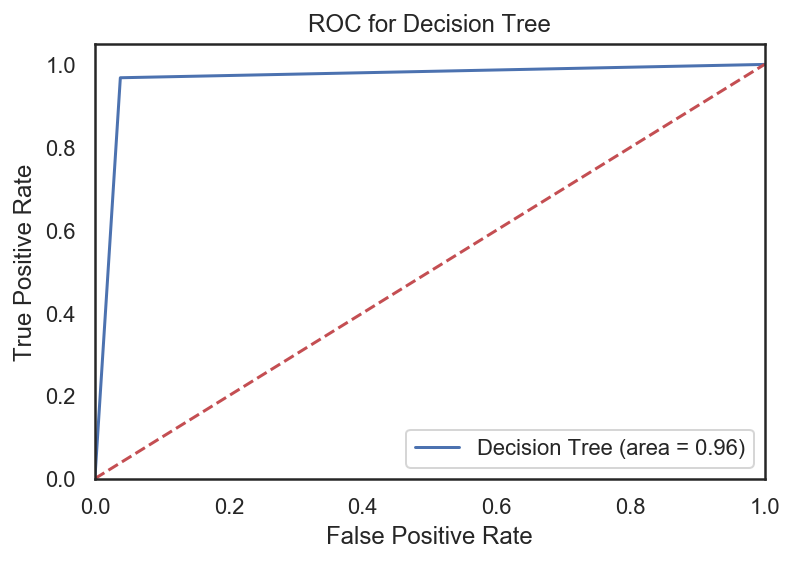

In [266]:
# ROC score
from sklearn.metrics import roc_auc_score

dtc_roc_auc = roc_auc_score(y_test, y_pred_dtc)
print(dtc_roc_auc)

# ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, dtc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dtc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Decision Tree')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Recursive feature elimination | Feature importance

I used the recursive feature elimination to have a look of features importance from decision tree classifier.

In [267]:
# import RFE
from sklearn.feature_selection import RFE

# initialize the model using the decision tree model
estimator = dtc

n_features = 5

selector = RFE(estimator, n_features)

In [268]:
# fit the model
selector = selector.fit(X,y)

In [269]:
# print the rating
print(selector.support_)
print(selector.ranking_)

[ True  True  True  True False False False False  True]
[1 1 1 1 4 5 2 3 1]


In [270]:
X.head(1)

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,promotion_last_5years,department,salary,avg_weekly_hours
0,0.38,0.53,2,3,0,0,0,0,0.285047


(<Figure size 648x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x15101a561d0>)

Text(0.5, 0, 'Feature')

Text(0, 0.5, 'Importance')

Text(0.5, 1.0, 'Features Importance')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

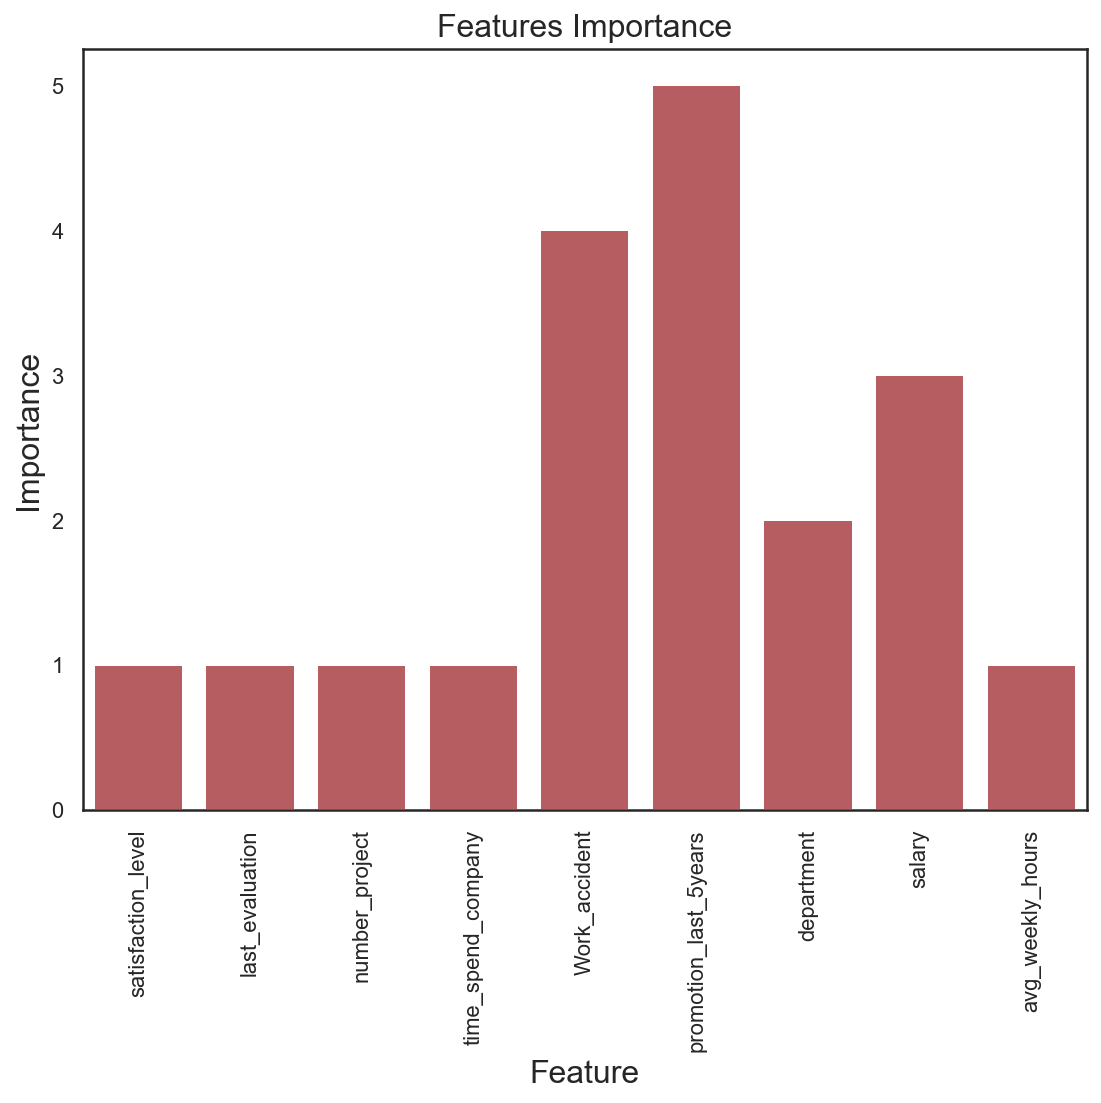

In [271]:
# plot feature importance
x = data_ml.drop('left', axis = 1).columns
y = list(selector.ranking_)# / max(selector.ranking_)

plt.subplots(figsize=(9,7))
sns.barplot(x = x,
            y = y,
            color='r')

plt.xlabel('Feature', fontsize = 16, )
plt.ylabel('Importance', fontsize = 16)
plt.title('Features Importance', fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

Feature importancce is ranked from most important (1) to least important (5).
In this case, the most important features are:
- Satisfaction Level
- Last Evaluation
- Number of Projects
- Years in the company
- Average weekly hours

### Cross-Validation

In [279]:
from sklearn.model_selection import cross_val_score

cv = 10
scores = cross_val_score(dtc, X, y, cv=cv)
scores                                              

array([0.98600933, 0.97866667, 0.97      , 0.966     , 0.95866667,
       0.978     , 0.98733333, 0.99133333, 1.        , 1.        ])

In [280]:
# mean score and 95% confidence interval of the score
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.03)


### Analyze predictions

In [287]:
# apply the model to all employees
y_pred_company = dtc.predict(X)

In [288]:
y_pred_company.shape

(14999,)

In [289]:
# add the predictions as a column to the dataframe
data_pred = data.copy()
data_pred['pred'] = y_pred_company
data_pred.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,avg_weekly_hours,pred
0,0.38,0.53,2,157,3,0,1,0,sales,low,39.25,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,65.50,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,68.00,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,55.75,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,39.75,1


In [292]:
# check for the likely to leave the company employees
likely_to_leave_emp = data_pred[(data_pred.left == 0) & (data_pred.pred == 1)]
likely_to_leave_emp.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,avg_weekly_hours,pred
2001,0.82,0.67,2,202,3,0,0,0,sales,low,50.50,1
2007,0.99,0.91,5,136,4,0,0,0,sales,low,34.00,1
2009,0.74,0.64,4,268,3,0,0,0,sales,low,67.00,1
2039,0.52,0.88,3,179,2,1,0,0,support,low,44.75,1
2042,0.71,0.92,3,202,4,0,0,0,technical,low,50.50,1


In [295]:
len(likely_to_leave_emp)

367

## Unsupervised Machine Learning
### Modeling, prediction and evaluation

I used KMean clustering model to try 

The methodology that I followed when building the classifiers goes as follows:
- load the model
- initialize the model
- fit the model to the training data
- calculate accuracy score for the train data
- predict the response for the test data
- plot confusion matrix
- calculate accuracy score for the test and predicted data
- compare accuracy scores and pick the best estimator using test data.

To evaluate the best estimator model, besides accuracy score, I also used:
- Siluette score
- Elbow.

#### Dimension reduction

In [374]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA

In [399]:
# Standardize the feature matrix
X_clust = data_ml
features = StandardScaler().fit_transform(X_clust)

In [400]:
# Create a ICA that will retain 99% of variance
#pca = PCA(n_components=0.99, whiten=True)
transformer = PCA(n_components=0.99, whiten=True)

In [401]:
# Conduct ICA
features_transformed = transformer.fit_transform(features)

In [402]:
# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_transformed.shape[1])

Original number of features: 10
Reduced number of features: 10


#### KMean

In [327]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [403]:
# gridsearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'n_clusters': np.arange(2,17)} 
cluster_kmean = KMeans(n_clusters=2,
                      random_state=0,
                      n_jobs=-1)
kmean_cv = GridSearchCV(cluster_kmean,
                        param_grid,
                        cv=10)
kmean_cv.fit(features)
kmean_cv.best_params_

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++',
                              max_iter=300, n_clusters=2, n_init=10, n_jobs=-1,
                              precompute_distances='auto', random_state=0,
                              tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'n_clusters': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

{'n_clusters': 16}

In [404]:
# create k-mean object
kmeans = KMeans(n_clusters=10, random_state=0, n_jobs=-1)

# train model
model_kmeans = kmeans.fit(features)

#add new column 'labels' to data
data_cluster = data_ml.copy()
data_cluster['labels_kmean'] = model_kmeans.labels_
data_cluster.head()

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,avg_weekly_hours,labels_kmean
0,0.38,0.53,2,3,0,1,0,0,0,39.25,2
1,0.80,0.86,5,6,0,1,0,0,1,65.50,3
2,0.11,0.88,7,4,0,1,0,0,1,68.00,6
3,0.72,0.87,5,5,0,1,0,0,0,55.75,3
4,0.37,0.52,2,3,0,1,0,0,0,39.75,2


In [405]:
data_cluster['labels_kmean'].value_counts()

1    2678
9    2244
8    1965
0    1831
2    1593
5    1498
6    1036
3     977
4     858
7     319
Name: labels_kmean, dtype: int64

In [406]:
# predict
#y_kmeans = kmeans.predict(X_clust)
#y_kmeans

In [407]:
# examine a table of clusters, for example per years in the company
data_cluster[['satisfaction_level','labels_kmean']].head()

,satisfaction_level,labels_kmean
0,0.38,2
1,0.80,3
2,0.11,6
3,0.72,3
4,0.37,2


In [408]:
kmeans.cluster_centers_

array([[ 2.02649909e-01, -1.29619772e-02, -2.01129912e-02,
        -2.47347944e-01,  2.43211190e+00, -5.42327363e-01,
        -1.47411822e-01,  4.89439400e-02,  3.50813334e-03,
        -4.48932883e-02],
       [ 5.02022322e-01,  2.03238437e-01, -4.50129118e-02,
        -4.38930513e-01, -4.11165293e-01, -5.47599785e-01,
        -1.47411822e-01, -3.83646303e-01,  1.02699228e+00,
         1.35559816e-01],
       [-8.15476273e-01, -1.15974562e+00, -1.41244157e+00,
        -3.21887976e-01, -2.86225303e-01,  1.78891700e+00,
        -1.47411822e-01, -1.07787591e-01, -2.80165073e-01,
        -1.09075893e+00],
       [ 7.52237972e-01,  1.13790837e+00,  5.94930373e-01,
         1.09093593e+00, -2.94756810e-01,  1.78411062e+00,
        -1.47411822e-01, -3.84658509e-02, -3.02049730e-01,
         8.48175074e-01],
       [-6.81197224e-02,  4.45808934e-03,  1.24800424e-01,
         2.68728967e+00, -5.32702618e-02, -5.58997427e-01,
        -1.47411822e-01, -3.70084808e-02,  4.36708696e-01,
         2.

Text(0.5, 1.0, 'Satisfaction level vs Salary')

Text(0.5, 0, 'Satisfaction Level')

Text(0, 0.5, 'Salary')

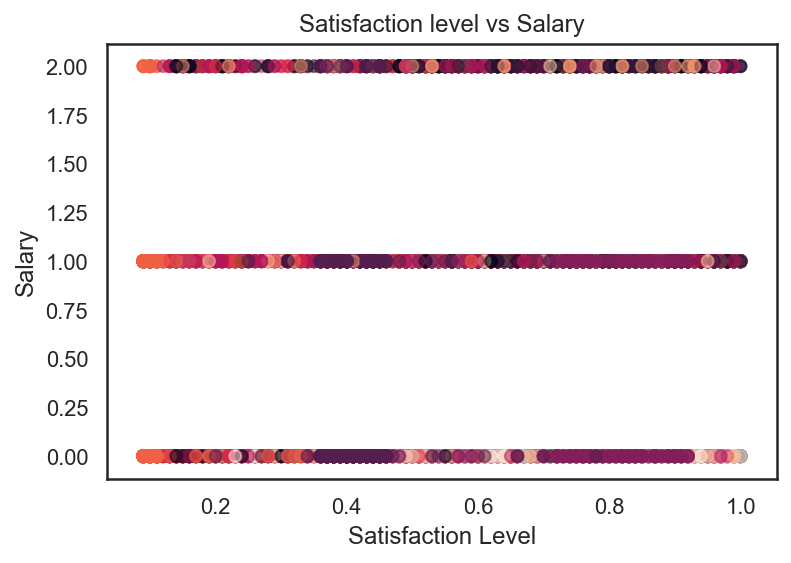

In [409]:
plt.scatter(x = 'satisfaction_level',
            y = 'salary',
            c = 'labels_kmean',
            data = data_cluster,
            alpha = 0.5)
plt.title('Satisfaction level vs Salary')
plt.xlabel('Satisfaction Level')
plt.ylabel('Salary')
plt.show()

Text(0.5, 1.0, 'Satisfaction level vs Avg Weekly Hours')

Text(0.5, 0, 'Satisfaction Level')

Text(0, 0.5, 'Avg Weekly Hours')

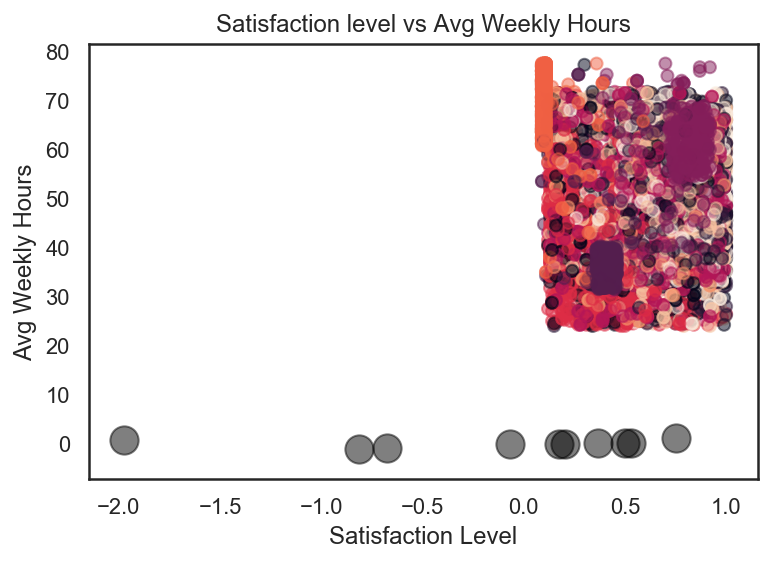

In [412]:
plt.scatter(x = 'satisfaction_level',
            y = 'avg_weekly_hours',
            c = 'labels_kmean',
            data = data_cluster,
            alpha = 0.5)
plt.title('Satisfaction level vs Avg Weekly Hours')
plt.xlabel('Satisfaction Level')
plt.ylabel('Avg Weekly Hours')

centers_kmean = kmeans.cluster_centers_
plt.scatter(centers_kmean[:,0],
            centers_kmean[:,1],
            c = 'black',
            s = 200,
            alpha = 0.5)

plt.show()